In [9]:

import pathlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
DATA_DIR = pathlib.Path.cwd().parent / "data" / "raw" / "admission.csv"

In [11]:
df = pd.read_csv(DATA_DIR)
df = df.drop("Serial No.", axis=1)
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# *Exploration*

In [12]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [17]:
df = df.rename(
    columns=
            {
                "GRE Score":"gre_score",
                "TOEFL Score":"toefl_score",
                "University Rating":"university_rating",
                "SOP":"sop",
                "LOR ":"lor",
                "CGPA":"cgpa",
                "Research":"research",
                "Chance of Admit ":"chance_of_admit"
            }
        )

In [18]:
print("\nMissing data by column :\n", df.isnull().sum())


Missing data by column :
 gre_score            0
toefl_score          0
university_rating    0
sop                  0
lor                  0
cgpa                 0
research             0
chance_of_admit      0
dtype: int64


# *Visualization*

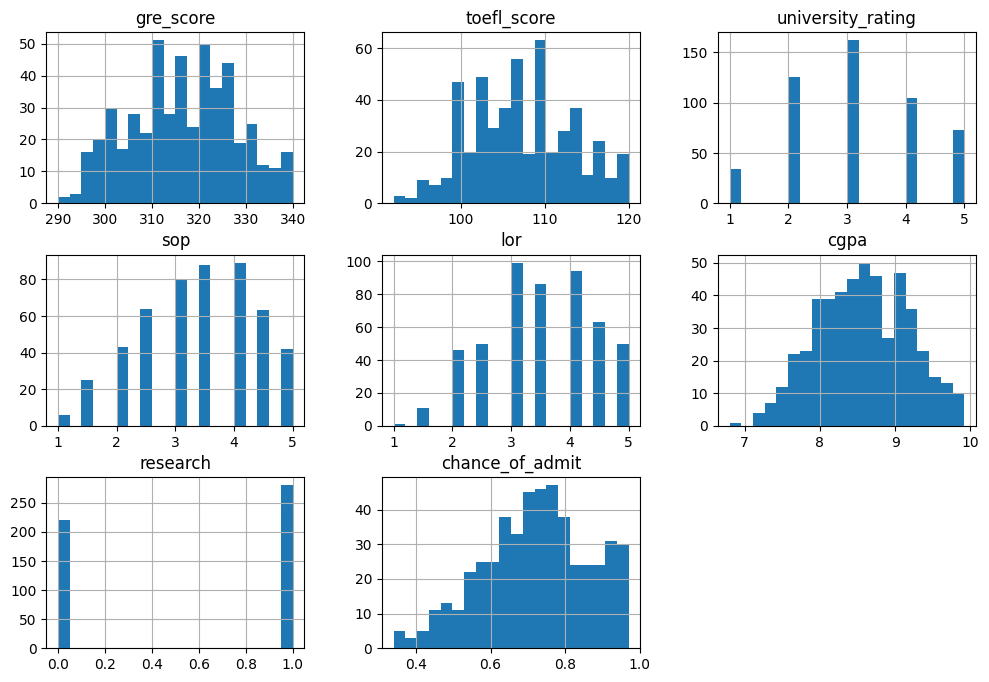

In [19]:
df.hist(figsize=(12, 8), bins=20)
plt.title("Distribution des variables")
plt.show()

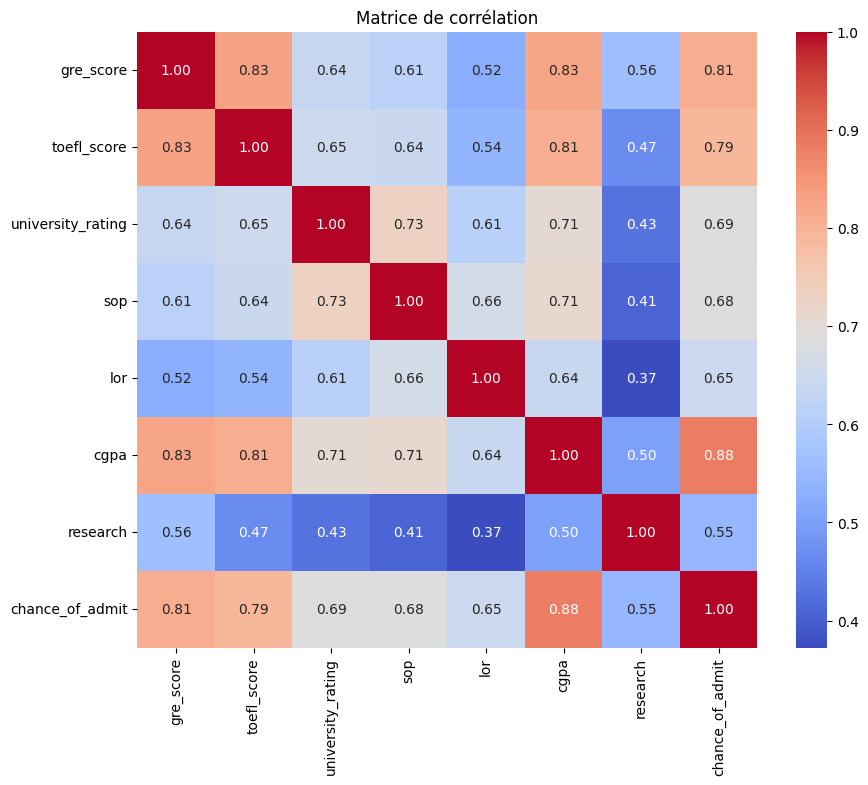

In [20]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# *Data preprocessing*

In [21]:
X = df.drop("chance_of_admit", axis=1)
y = df["chance_of_admit"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# *Modelisation*

In [25]:
model = LinearRegression()
param_grid = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]}, scoring='r2')

In [26]:
print("Meilleurs paramètres :", grid_search.best_params_)
best_model = grid_search.best_estimator_

Meilleurs paramètres : {'fit_intercept': True}


# *Evaluation*

In [27]:
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

In [28]:
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("\nÉvaluation du modèle :")
print(f"R² (Entraînement) : {train_r2:.2f}")
print(f"R² (Test) : {test_r2:.2f}")
print(f"MSE (Entraînement) : {train_mse:.4f}")
print(f"MSE (Test) : {test_mse:.4f}")


Évaluation du modèle :
R² (Entraînement) : 0.82
R² (Test) : 0.82
MSE (Entraînement) : 0.0035
MSE (Test) : 0.0037


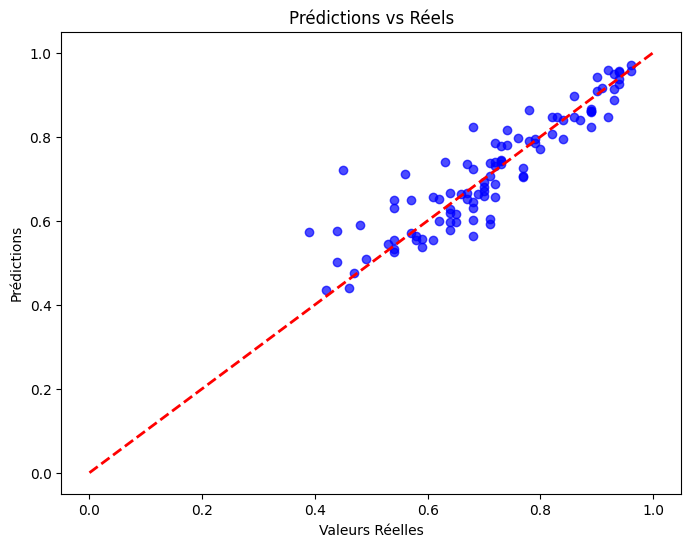

In [29]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7, color='blue')
plt.plot([0, 1], [0, 1], '--r', linewidth=2)
plt.title("Prédictions vs Réels")
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.show()